In [183]:
# Import Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pymysql as mysql
import warnings
import seaborn as sns


# order_items_dataset

In [184]:
# import data 
items_df = pd.read_csv("/Users/summerpurschke/Library/Containers/com.microsoft.Excel/Data/Desktop/Brazilian E-Com Data/olist_order_items_dataset.csv")

# drop rows, comment this out to run EDA on this section 
#items_df = items_df.drop(columns = ['shipping_limit_date', 'freight_value'])

items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### How many orders per day?

In [185]:
# Change shipping date to date and time 
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

# Splitting the date part from DataFrame
items_df['Date'] = [d.date() for d in items_df['shipping_limit_date']]

# Splitting the time part from DataFrame
items_df['Time'] = [d.time() for d in items_df['shipping_limit_date']]

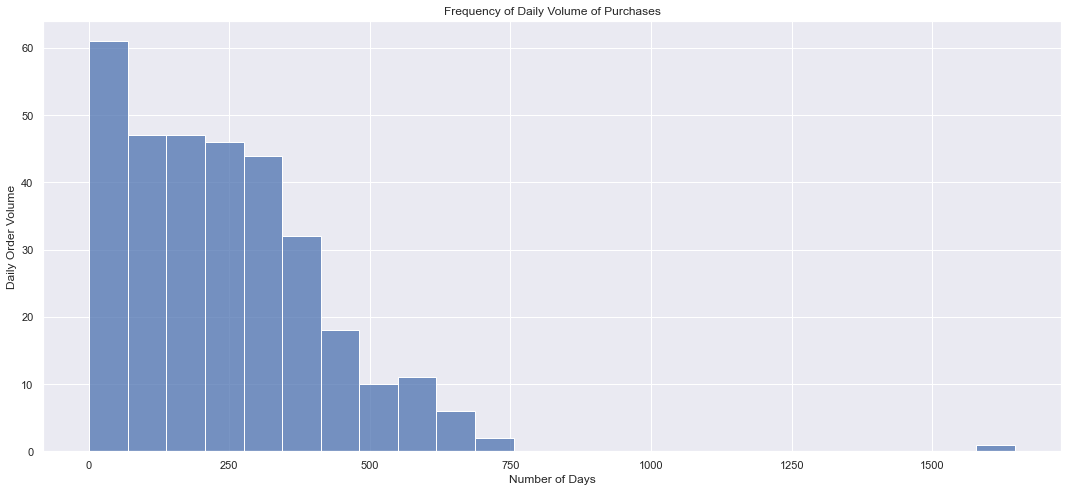

In [186]:
# Calculate how many days had each volume of orders
no_orders_in_one_day = pd.DataFrame(orders_per_day['total_orders'].unique()).reset_index()
no_orders_in_one_day.columns = ['number_orders', 'number_occurances']
no_orders_in_one_day

# Create barchart of total orders per day 
sns.histplot(no_orders_in_one_day, x = 'number_occurances')

# Set title and x-axis ticks
plt.title("Frequency of Daily Volume of Purchases")
plt.xlabel("Number of Days")
plt.ylabel("Daily Order Volume")
plt.tight_layout()
plt.show(barplot)

In [187]:
# Calculate total orders on each day 
orders_per_day = items_df.groupby(['Date']).count().reset_index()
orders_per_day = pd.DataFrame(orders_per_day, columns = ['Date', 'order_id'])
orders_per_day.rename(columns = {'order_id':'total_orders'}, inplace = True)
 # This is a time series application that we won't be exploring further



In [188]:
# explore product_id values 
print("There are", items_df['product_id'].nunique(), "unique products.")

There are 32951 unique products.


In [189]:
# explore seller_id values 
print("There are", items_df['seller_id'].nunique(), "unique sellers.")

There are 3095 unique sellers.


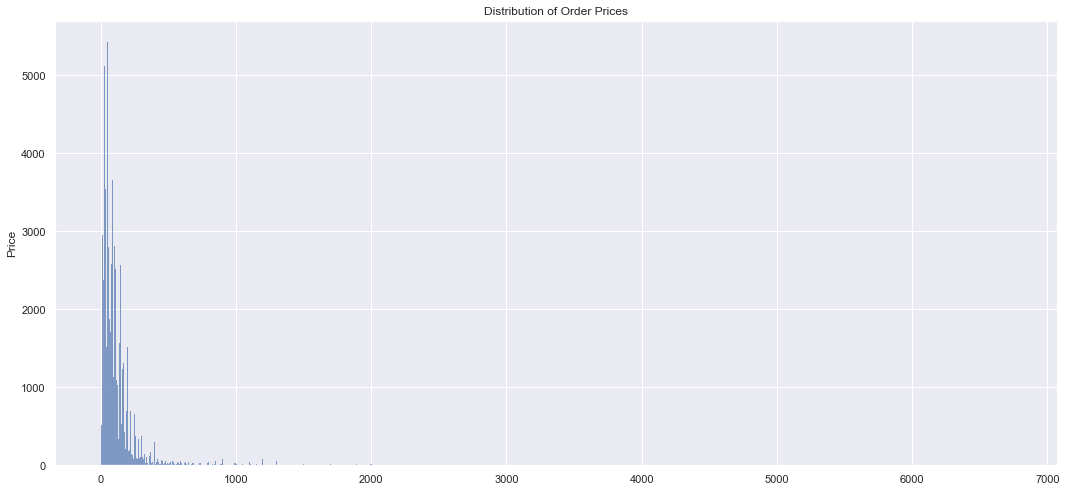

In [190]:
# Create barchart of price distribution of orders
sns.histplot(items_df['price'])

# Set title and x-axis ticks
plt.title("Distribution of Order Prices")
plt.xlabel("")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [191]:
# How many products per seller? 
seller_products = items_df.groupby(['seller_id']).count().reset_index()
seller_products = pd.DataFrame(seller_products, columns = ['seller_id', 'product_id'])
seller_products.rename(columns = {'product_id':'total_products_per_seller'}, inplace = True)

# Create barchart of total orders per day 
#sns.barplot(seller_products['total_products_per_seller'], seller_products['seller_id'])

In [192]:
#Drop columns after analysis 
items_df = items_df.drop(columns = ['shipping_limit_date', 'freight_value'])

# reviews_dataset

In [193]:
# import data 
reviews_df = pd.read_csv("/Users/summerpurschke/Library/Containers/com.microsoft.Excel/Data/Desktop/Brazilian E-Com Data/olist_order_reviews_dataset.csv")

#drop columns
reviews_df = reviews_df.drop(columns = ['review_creation_date', 'review_answer_timestamp']) 
    # may choose to look at how reviews changed over time, but leaving it out for now 

reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...


In [194]:
# checking null values 
reviews_df.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title      87656
review_comment_message    58247
dtype: int64

In [195]:
reviews_df.dropna().shape # we have this many complete rows with no missing values 

(9839, 5)

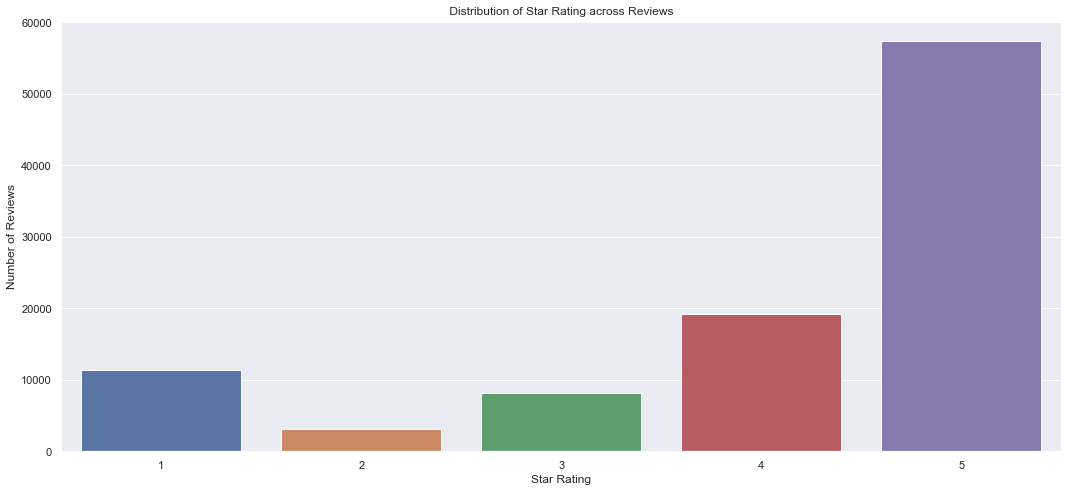

In [196]:
# distribution of ratings 
review_scores = pd.DataFrame(reviews_df.groupby(['review_score'])['order_id'].count().reset_index())

# Create plot
sns.barplot(x = review_scores['review_score'], y = review_scores['order_id'])
plt.title(" Distribution of Star Rating across Reviews ")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

# orders_dataset 

In [197]:
# import table
orders_df = pd.read_csv("/Users/summerpurschke/Library/Containers/com.microsoft.Excel/Data/Desktop/Brazilian E-Com Data/olist_orders_dataset.csv")
orders_df = orders_df[orders_df['order_status']=='delivered'] # drop rows of non-delivered data 

# drop unneeded columns 
orders_df = orders_df.drop(columns = ['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date'])

# create date time from strings 
orders_df['order_delivered_customer_date'] = (pd.to_datetime(orders_df['order_delivered_customer_date'])).dt.date # drop timestamp
orders_df['order_estimated_delivery_date'] = (pd.to_datetime(orders_df['order_estimated_delivery_date'])).dt.date

# Create new column 
orders_df['days_late'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.date # need this to be integer value 

# Drop columns used in feature engineering 
orders_df = orders_df.drop(columns = ['order_estimated_delivery_date', 'order_delivered_customer_date'])

orders_df

AttributeError: 'TimedeltaProperties' object has no attribute 'date'

# products_dataset


In [ ]:
# import data
products_df = pd.read_csv("/Users/summerpurschke/Library/Containers/com.microsoft.Excel/Data/Desktop/Brazilian E-Com Data/olist_products_dataset.csv")

# drop columns
products_df = products_df.drop(columns = ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'])

# drop na values 
products_df = products_df.dropna()

products_df.head()


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
# How many product categories? How many products per category? 
product_categories = products_df.product_category_name.value_counts().reset_index()

# renaming categories 
product_categories.rename(columns={'index': 'product_category', 'product_category_name': 'no_products'}, inplace=True)

# Saving top X amount to dataframe for visualization 
product_categories_top_list = product_categories.head(20)

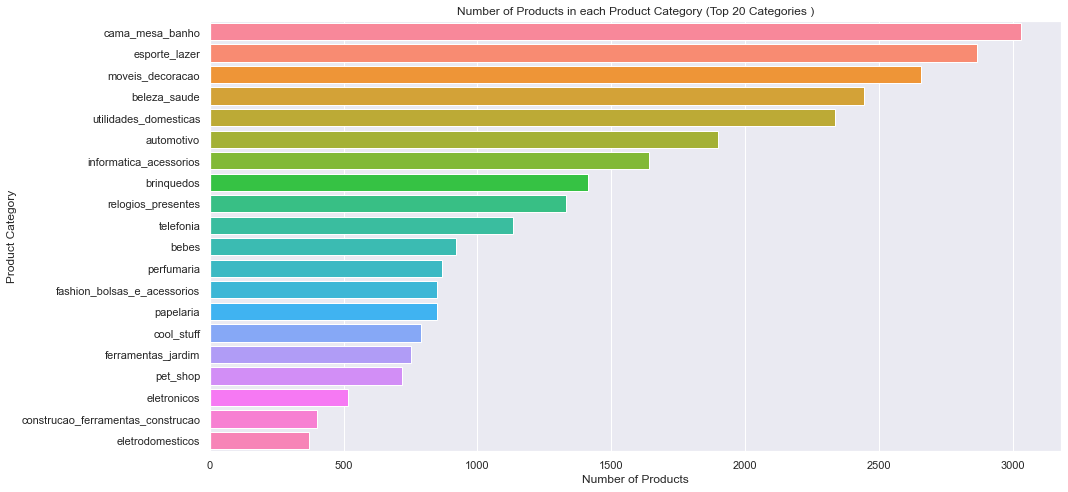

In [ ]:
# Create plot
barplot = sns.barplot(y="product_category", x="no_products", data=product_categories_top_list, saturation=1)

# Set title and x-axis ticks
plt.title("Number of Products in each Product Category (Top 20 Categories )")

# Helper code to show actual values afters bars
#show_values_barplot(barplot, 0.1)

plt.xlabel("Number of Products")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show(barplot)

# category_name_translation_data 
- Need to use this as a dictionary to merge with other data and drop portugese

In [ ]:
translation_df = pd.read_csv("/Users/summerpurschke/Desktop/Brazilian E-Com Data/product_category_name_translation.csv")
translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
